<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Pipeline - Decision Tree Regression - Diamonds
</b></font> </br></p>

---


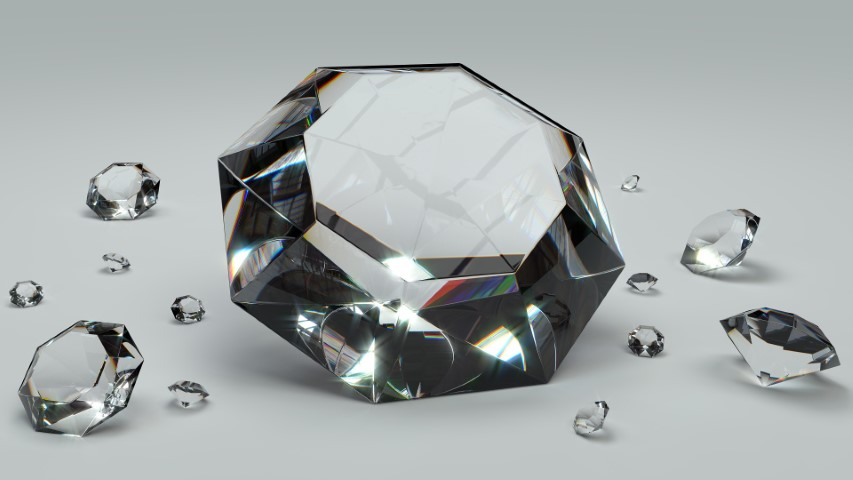

Bild von <a href="https://pixabay.com/de/users/colin00b-346653/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Colin Behrens</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1186139">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---

Dieser klassische Datensatz enthält die Preise und andere Attribute von fast 54.000 Diamanten.



[DataSet](https://www.openml.org/search?type=data&status=active&id=42225)

[Info](https://www.kaggle.com/datasets/shivam2503/diamonds)


In [ ]:
data_id = 42225
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', data_id=data_id)

In [ ]:
label = 'price'
features = [n for n in df.frame.columns if n != label]

target = df.frame[label].copy()
data = df.frame[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
target.value_counts()

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Duplikate ermitteln
</font></p>

In [ ]:
duplicates = df.frame[df.frame.duplicated()]
print("Anzahl Duplicate: ", len(duplicates))
# print("Duplizierte Einträge:")
# print(duplicates)

<p><font color='black' size="5">
Import & Konfiguration Pipeline
</font></p>

In [ ]:
from sklearn.pipeline import Pipeline

<p><font color='black' size="5">
Missing Values & Codierung - Pipeline für kategoriale Features
</font></p>

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

pipe_cat = Pipeline([
    ('imputer_c', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(unknown_value=999, handle_unknown='use_encoded_value'))
     ])

<p><font color='black' size="5">
Missing Values & Skalierung - Pieline für numerische Features
</font></p>

In [ ]:
from sklearn.preprocessing import StandardScaler
pipe_num = Pipeline([
    ('imputer_n', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
     ])

In [ ]:
# display estimators as diagrams
from sklearn import set_config
set_config(display='diagram')

<p><font color='black' size="5">
Verbinden der beiden Pipelines zu einer Prepare-Pipeline
</font></p>

In [ ]:
from sklearn.compose import ColumnTransformer
pipe_prepare = ColumnTransformer(transformers=[
      ('categorical', pipe_cat, cat_col),
      ('numerical', pipe_num, num_col)])

# **3 <font color='orange'>|</font>  Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.30, shuffle=True, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

 <p><font color='black' size="5">
Modellauswahl, Verbinden Prepare- & Model-Pipeline, Training
</font>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [ ]:
model = Pipeline([
                  ('prepare', pipe_prepare),
                  ('feature_selection', SelectKBest(score_func=f_regression, k=6)),
                  ('tree', DecisionTreeRegressor(max_depth=4, min_samples_split=50)) ])

In [ ]:
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>


<p><font color='black' size="5">
Prediction
</font></p>


In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2:5.2f}' )

In [ ]:
r2 = r2_score(target_test, target_test_pred)
print(f'Modell: {model} -- Test --- Bestimmtheitsmass: {r2:5.2f}' )

<p><font color='black' size="5">
Mean Absolut Error
</font></p>

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(target_test, target_test_pred)
print(f'Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}' )


<p><font color='black' size="5">
Analyse von Zwischenschritten einer Pipeline
</font></p>

In [ ]:
 # Konfiguration Pipeline 'prepare'
 model.named_steps.prepare

In [ ]:
# Mittelwerte der skalierten Features
pipe_prepare.named_transformers_['numerical'].named_steps['scaler'].mean_

In [ ]:
# Namen der 4 ausgewählten Features - in der Pipeline werden die Column-Names nicht durchgereicht!
model.named_steps['feature_selection'].get_feature_names_out()

In [ ]:
# Überführen in Column-Names
feature_index = model.named_steps['feature_selection'].get_feature_names_out()
index = [int(i[1:]) for i in feature_index]
feature_ = data.columns[index]
feature_

In [ ]:
# Anzahl der in DecisionTreeRegression verwendeten Features
model.named_steps['tree'].n_features_in_

dot-Format kann auch über Online visualisiert werden.


[Wikipedia](https://www.wikiwand.com/de/DOT_(GraphViz))

[Sketchviz](https://sketchviz.com/new)

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>

<p><font size="5">
Speichern des Modells
</p>

In [ ]:
%%capture
try:
    from sklearn2pmml import sklearn2pmml, make_pmml_pipeline
    from pypmml import Model
except:
    !pip install -q sklearn2pmml
    !pip install -q pypmml
    from sklearn2pmml import sklearn2pmml, make_pmml_pipeline
    from pypmml import Model

In [ ]:
pmml_pipe = make_pmml_pipeline(model, data.columns.values, target.name)
sklearn2pmml(pmml_pipe, "trained_model_diamonds.pmml", with_repr = True)

<p><font size="5">
Laden des trainierten Modells
</p>

In [ ]:
from pypmml import Model
model_load = Model.load('/content/trained_model_diamonds.pmml')

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
data.iloc[46398].values

In [ ]:
target[46398], target_test_pred[6]

In [ ]:
# eine 'neuer' Datensatz zur Prognose an das Modell übergeben
new_data = { 'carat': [0.51],
            'cut': ['Ideal'],
            'color': ['F'],
            'clarity': ['VS1'],
            'depth': [60.2],
            'table': [56.0],
            'x': [5.22],
            'y': [5.24],
            'z': [3.15] }
new = pd.DataFrame(new_data)

In [ ]:
model_load.predict(new)